## Oil and Gas Production Forecast
### Part_3.
### 1.1 Import Librries

In [1]:
import pandas as pd
import numpy as np
import warnings

from  datetime import datetime, timedelta
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import category_encoders as ce

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import gc
%matplotlib inline
warnings.filterwarnings('ignore')

### 1.2 Read in data

In [2]:
fld = pd.read_csv('data/fld.csv')

In [3]:
df_1 = pd.read_csv('data/df_1.csv')
df_2 = pd.read_csv('data/df_2.csv')
df_3 = pd.read_csv('data/df_3.csv')
df = df_1.append(df_2).append(df_3)
del df_1, df_2, df_3
gc.collect()

11

In [4]:
df.reset_index(drop=True, inplace=True)

In [5]:
df.head(4).append(df.tail(3))

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production,Well Type
0,31009019120000,1988,"Sager, Howard & Judith",0.0,500.0,0.0,12.0,GD
1,31009019120000,1989,"Sager, Howard & Judith",0.0,500.0,0.0,0.0,GD
2,31009019120000,1990,"Sager, Howard & Judith",0.0,500.0,0.0,12.0,GD
3,31009019120000,1991,"Sager, Howard & Judith",0.0,500.0,0.0,12.0,GD
121155,31029255050000,2017,U. S. Energy Development Corporation,0.0,2126.0,42.0,7.0,Gas Development
121156,31029255050000,2018,U. S. Energy Development Corporation,0.0,318.0,45.0,7.0,Gas Development
121157,31029255050000,2019,U. S. Energy Development Corporation,0.0,2436.0,0.0,12.0,Gas Development


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121158 entries, 0 to 121157
Data columns (total 8 columns):
API Well Number         121158 non-null int64
Year                    121158 non-null int64
Operator                121158 non-null object
OIL (Bbls)              102545 non-null float64
GAS (Mcf)               120678 non-null float64
WATER (Bbls)            116452 non-null float64
Months in Production    120252 non-null float64
Well Type               121158 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 7.4+ MB


In [7]:
fld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 51 columns):
API Well Number                   4717 non-null int64
County Code                       4717 non-null int64
API Hole Number                   4717 non-null int64
Sidetrack                         4717 non-null int64
Completion                        4717 non-null int64
Well Name                         4717 non-null object
Company Name                      4689 non-null object
Operator Number                   4717 non-null int64
Well Type                         4717 non-null object
Map Symbol                        4717 non-null object
Well Status                       4717 non-null object
Status Date                       572 non-null object
Permit Application Date           4413 non-null object
Permit Issued Date                4455 non-null object
Date Spudded                      4629 non-null object
Date of Total Depth               4460 non-null object
Date Well Completed 

In [8]:
fld.sample(3)

,API Well Number,County Code,API Hole Number,Sidetrack,Completion,Well Name,Company Name,Operator Number,Well Type,Map Symbol,...,Permit Fee,Objective Formation,Depth Fee,Spacing,Spacing Acres,Integration,Hearing Date,Date Last Modified,DEC Database Link,Location 1
4396,31013245520000,13,24552,0,0,Holmquist Unit 2,Universal Resources Holdings Incorporated,778,GD,GW,...,1810.0,Medina,1710.0,Exempt from Title 5; complies with 6 NYCRR 553...,NaN,No integration order required,NaN,2007-05-16T00:00:00,{'url': 'http://www.dec.ny.gov/cfmx/extapps/Ga...,"{'longitude': '-79.21783', 'needs_recoding': F..."
827,31013099630000,13,9963,0,0,Chylinski Raymond V 1,Empire Energy E&P LLC,2544,GD,GW,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2010-06-04T00:00:00,{'url': 'http://www.dec.ny.gov/cfmx/extapps/Ga...,"{'longitude': '-79.66523', 'needs_recoding': F..."
1286,31013116570000,13,11657,0,0,Paddock 274,Empire Energy E&P LLC,2544,GD,GW,...,0.0,NaN,0.0,NaN,NaN,NaN,NaN,2010-06-04T00:00:00,{'url': 'http://www.dec.ny.gov/cfmx/extapps/Ga...,"{'longitude': '-79.49226', 'needs_recoding': F..."


### Data Cleaning

In [9]:
fld['Well Type'].unique()

array(['GD'], dtype=object)

In [10]:
fld['Map Symbol'].unique()

array(['GWP', 'GW', 'O'], dtype=object)

In [11]:
fld.describe()

,API Well Number,County Code,API Hole Number,Sidetrack,Completion,Operator Number,Region,"Proposed Depth, ft",Surface Longitude,Surface Latitude,Bottom Hole Longitude,Bottom Hole Latitude,"True Vertical Depth, ft","Measured Depth, ft","Kickoff, ft","Drilled Depth, ft","Elevation, ft",Permit Fee,Depth Fee,Spacing Acres
count,4.717000e+03,4717.000000,4717.000000,4717.0,4717.000000,4717.000000,4717.0,4716.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.000000,4717.0,4717.000000,4444.000000,4716.000000,4717.000000,22.000000
mean,3.101271e+13,12.544626,16953.453890,0.0,0.018868,2272.140767,9.0,2812.433418,-79.316538,42.258476,-79.316536,42.258484,3554.433326,3554.430570,0.0,3554.430570,1369.596985,611.036684,559.059360,53.965909
std,1.620988e+09,1.622432,6011.530453,0.0,0.146576,1527.626292,0.0,1690.720419,0.222828,0.143486,0.222827,0.143491,775.597958,775.597873,0.0,775.597873,345.668537,656.604968,612.319424,27.441319
min,3.100901e+13,9.000000,255.000000,0.0,0.000000,13.000000,9.0,0.000000,-79.761600,41.999480,-79.761600,41.999480,0.000000,0.000000,0.0,0.000000,3.000000,0.000000,0.000000,35.200000
25%,3.101311e+13,13.000000,13043.000000,0.0,0.000000,1192.000000,9.0,2100.000000,-79.509110,42.151120,-79.509110,42.151120,3116.000000,3116.000000,0.0,3116.000000,1260.000000,0.000000,0.000000,40.000000
50%,3.101316e+13,13.000000,17148.000000,0.0,0.000000,2544.000000,9.0,3520.000000,-79.293470,42.257070,-79.293470,42.257070,3708.000000,3708.000000,0.0,3708.000000,1461.000000,20.000000,0.000000,41.030000
75%,3.101319e+13,13.000000,20246.000000,0.0,0.000000,2544.000000,9.0,4095.000000,-79.139240,42.369260,-79.139240,42.369260,4166.000000,4166.000000,0.0,4166.000000,1610.000000,1225.000000,1125.000000,51.130000
max,3.102966e+13,29.000000,67321.000000,0.0,2.000000,9998.000000,9.0,6501.000000,-78.756970,42.693560,-78.756970,42.693560,6182.000000,6182.000000,0.0,6182.000000,2625.000000,11000.000000,10900.000000,146.800000


In [12]:
fld['Completion'].value_counts()

0    4635
1      75
2       7
Name: Completion, dtype: int64

In [13]:
# fld['Spacing Acres'].unique()

In [14]:
# fld['Location 1'].unique()

In [15]:
# fld['Surface Latitude'].unique()
fld['Original Well Type'].unique()

array(['NL', 'GW', 'GD', 'OD'], dtype=object)

In [16]:
# Drop Numerical columns which are not required for analysis
fld.drop(columns=['API Hole Number','Sidetrack','Permit Fee', 
                  'Depth Fee', 'Spacing Acres'], inplace=True)

In [17]:
# Drop Categorical columns which are not required for analysis
fld.drop(columns=['Financial Security','Location 1', 'Integration',
                  'Hearing Date', 'Date Last Modified', 'DEC Database Link',
                  'Spacing', 'State Lease','Well Name'], inplace=True)

In [18]:
fld["Status Date"].isna().sum()

4145

In [19]:
fld['Company Name'].nunique(), fld['Operator Number'].nunique()

(352, 353)

In [20]:
fld.drop(columns=['Status Date', 'Permit Application Date', 'Map Symbol',
                 'Permit Issued Date','Company Name'], inplace=True)

In [21]:
fld.Quad.unique()

array(['Cherry Creek', 'Collins Center', 'Gowanda', 'Steamburg',
       'Farnham', 'North Collins', 'Randolph', 'New Albion', 'Kennedy',
       'Ivory', 'Perrysburg', 'Cattaraugus', 'Brocton', 'Silver Creek',
       'Dunkirk', 'Forestville', 'Cassadaga', 'Ellery Center',
       'North Of Dunkirk', 'Gerry', 'Ripley', 'South Ripley', 'Westfield',
       'Chautauqua', 'Hartfield', 'Jamestown', 'Sherman', 'Panama',
       'Clymer', 'North Clymer', 'Hamlet', 'Lakewood', 'North East PA',
       'North East', 'Wattsburg, PA-NY', 'Sugar Grove, PA-NY',
       'Warren Pa', 'North Of Westfield', 'Youngsville PA', 'Langford',
       'Angola'], dtype=object)

In [22]:
fld['Quad Section'].unique()

array(['I', 'G', 'F', nan, 'C', 'D', 'H', 'B', 'A', 'E'], dtype=object)

In [23]:
fld['Quad Section'].isna().sum()

9

In [24]:
fld['Date Well Confidentiality Ends'].isna().sum()

3090

In [25]:
#fld['Confidentiality Code'].isna().sum(), 
fld['Confidentiality Code'].unique()

array(['Pre-1989 Well (N/A)', 'Released'], dtype=object)

In [26]:
del fld['Date Well Confidentiality Ends'], fld['Confidentiality Code'], fld['Town']

In [27]:
fld[['Date Spudded','Date of Total Depth','Date Well Completed', 'Date Well Plugged']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4717 entries, 0 to 4716
Data columns (total 4 columns):
Date Spudded           4629 non-null object
Date of Total Depth    4460 non-null object
Date Well Completed    4717 non-null object
Date Well Plugged      353 non-null object
dtypes: object(4)
memory usage: 147.5+ KB


In [28]:
del fld['Date Spudded'], fld['Date of Total Depth'],fld['Date Well Plugged']

In [29]:
fld.columns

Index(['API Well Number', 'County Code', 'Completion', 'Operator Number',
       'Well Type', 'Well Status ', 'Date Well Completed', 'Quad',
       'Quad Section', 'Producing Field', 'Producing Formation', 'Slant',
       'County', 'Region', 'Proposed Depth, ft', 'Surface Longitude',
       'Surface Latitude', 'Bottom Hole Longitude', 'Bottom Hole Latitude',
       'True Vertical Depth, ft', 'Measured Depth, ft', 'Kickoff, ft',
       'Drilled Depth, ft', 'Elevation, ft', 'Original Well Type',
       'Objective Formation'],
      dtype='object')

In [30]:
fld['Date Well Completed'] = pd.to_datetime(fld['Date Well Completed'])
fld ['Completion year'] = fld['Date Well Completed'].dt.year
#fld ['Completion month'] = fld['Date Well Completed'].dt.month
#fld ['Completion year'] += fld['Date Well Completed'].dt.month/12
# fld ['Completion day'] = fld['Date Well Completed'].dt.day
del fld['Date Well Completed']
# calendar['week'] = calendar['date'].dt.week.astype(np.int8)

In [31]:
# fld ['Completion year']

In [32]:
# fld.isna().sum()

In [33]:
fld['Objective Formation'].unique()

array([nan, 'Medina', 'Onondaga', 'Clinton', 'Bass Island', 'Glade',
       'Theresa', 'Whirlpool', 'Queenston'], dtype=object)

In [34]:
fld['Producing Formation'].unique()

array(['Medina', nan, 'Whirlpool', 'Onondaga', 'Grimsby', 'Camillus',
       'Upper Devonian', 'Unknown', 'Salina', 'Bass Island', 'Tully',
       'Upper Devonian Shale'], dtype=object)

In [35]:
# drop Ob`jective formation, and leave Producing formation as actual one
del fld['Objective Formation']

In [36]:
fld[fld.isna().any(axis=1)]

,API Well Number,County Code,Completion,Operator Number,Well Type,Well Status,Quad,Quad Section,Producing Field,Producing Formation,...,Surface Latitude,Bottom Hole Longitude,Bottom Hole Latitude,"True Vertical Depth, ft","Measured Depth, ft","Kickoff, ft","Drilled Depth, ft","Elevation, ft",Original Well Type,Completion year
9,31009011610000,9,0,261,GD,PA,Steamburg,NaN,Lakeshore,Medina,...,42.11175,-78.96941,42.11175,4765.0,4765.0,0.0,4765.0,1760.0,NL,1937
11,31009016650000,9,0,16,GD,PA,Gowanda,NaN,Lakeshore,Medina,...,42.38840,-78.90271,42.38840,3413.0,3413.0,0.0,3413.0,1372.0,NL,1911
20,31009128650000,9,0,460,GD,AC,Farnham,H,Lakeshore,Medina,...,42.50212,-79.04700,42.50212,2435.0,2435.0,0.0,2435.0,NaN,NL,1977
25,31009133630000,9,0,826,GD,PA,Gowanda,F,Lakeshore,Medina,...,42.42374,-78.90703,42.42374,3046.0,3046.0,0.0,3046.0,NaN,NL,1934
26,31009133640000,9,0,431,GD,PA,Gowanda,F,Lakeshore,Medina,...,42.42113,-78.91352,42.42113,2985.0,2985.0,0.0,2985.0,NaN,NL,1934
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4702,31029147150000,29,0,9006,GD,UN,Gowanda,B,Lakeshore,Medina,...,42.48012,-78.95392,42.48012,2359.0,2359.0,0.0,2359.0,NaN,NL,1927
4703,31029147170000,29,0,9006,GD,UN,North Collins,G,Lakeshore,Medina,...,42.51051,-78.96961,42.51051,2340.0,2340.0,0.0,2340.0,NaN,NL,1926
4714,31029557810000,29,0,2470,GD,PA,Angola,E,Lakeshore,NaN,...,42.69356,-79.03789,42.69356,1500.0,1500.0,0.0,1500.0,600.0,NL,2009
4715,31029664360000,29,0,9006,GD,UN,North Collins,G,Lakeshore,Medina,...,42.51828,-78.96218,42.51828,2307.0,2307.0,0.0,2307.0,NaN,GD,1917


In [37]:
fld.isna().sum()

API Well Number              0
County Code                  0
Completion                   0
Operator Number              0
Well Type                    0
Well Status                  0
Quad                         0
Quad Section                 9
Producing Field              0
Producing Formation         15
Slant                        0
County                       0
Region                       0
Proposed Depth, ft           1
Surface Longitude            0
Surface Latitude             0
Bottom Hole Longitude        0
Bottom Hole Latitude         0
True Vertical Depth, ft      0
Measured Depth, ft           0
Kickoff, ft                  0
Drilled Depth, ft            0
Elevation, ft              273
Original Well Type           0
Completion year              0
dtype: int64

### GAS production for each well

In [38]:
df.sample(10)

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production,Well Type
116799,31013243880000,2011,U. S. Energy Development Corporation,0.0,7741.0,0.0,12.0,Gas Development
3710,31009170550000,2006,"Pefley Oil & Gas, Inc.",NaN,0.0,0.0,0.0,Gas Development
17672,31013103930000,2005,Great Lakes Energy Partners,0.0,437.0,8.0,11.0,Gas Development
67011,31013162100000,2013,"EnerVest Operating, LLC",0.0,447.0,0.0,12.0,Gas Development
37575,31013122640000,1999,Belden & Blake Corporation,0.0,0.0,0.0,0.0,GD
2613,31009169210000,2011,"Texas Keystone, Inc.",0.0,0.0,0.0,0.0,Gas Development
115416,31013235820000,2007,"Nornew, Inc.",0.0,5348.0,0.0,12.0,Gas Development
44667,31013130640000,2009,"20 Bliss Street, Inc.",0.0,318.0,0.0,12.0,Gas Development
90399,31013185180000,1990,"Trahan Petroleum, Inc.",0.0,244.0,0.0,7.0,GD
103360,31013201740000,2013,Empire Energy E&P LLC,0.0,804.0,0.0,12.0,Gas Development


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121158 entries, 0 to 121157
Data columns (total 8 columns):
API Well Number         121158 non-null int64
Year                    121158 non-null int64
Operator                121158 non-null object
OIL (Bbls)              102545 non-null float64
GAS (Mcf)               120678 non-null float64
WATER (Bbls)            116452 non-null float64
Months in Production    120252 non-null float64
Well Type               121158 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 7.4+ MB


In [40]:
df['Well Type'].unique()

array(['GD', 'Dry Hole', 'Gas Development', 'Not Listed', 'OD',
       'Gas Wildcat', 'GAS', 'G', 'Oil Development'], dtype=object)

In [41]:
df['Well Type'].value_counts()

Gas Development    75921
GD                 37982
Not Listed          7157
Dry Hole              42
OD                    38
Gas Wildcat            9
G                      7
GAS                    1
Oil Development        1
Name: Well Type, dtype: int64

In [42]:
# df[df['Well Type']=='Gas Wildcat']

In [43]:
# df[df['Well Type']=='OD']

In [44]:
# df[df['Well Type']=='Dry Hole']

In [45]:
df['GAS (Mcf)'].isna().sum()

480

In [46]:
df[df.isna().any(axis=1)]

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production,Well Type
9,31009019120000,2000,"Sager, Howard & Judith",NaN,0.0,NaN,12.0,Dry Hole
11,31009019120000,2002,"Sager, Howard & Judith",0.0,NaN,0.0,12.0,Dry Hole
12,31009019120000,2003,"Sager, Howard & Judith",NaN,NaN,NaN,12.0,Dry Hole
13,31009019120000,2004,"Sager, Howard & Judith",NaN,NaN,NaN,12.0,Dry Hole
14,31009019120000,2005,"Sager, Howard & Judith",NaN,0.0,0.0,12.0,Dry Hole
...,...,...,...,...,...,...,...,...
121087,31029247590000,2007,U. S. Energy Development Corporation,NaN,1770.0,100.0,3.0,Not Listed
121088,31029247590000,2008,U. S. Energy Development Corporation,NaN,6301.0,75.0,11.0,Gas Development
121100,31029250720000,2008,U. S. Energy Development Corporation,NaN,5050.0,80.0,8.0,Gas Development
121112,31029250730000,2008,U. S. Energy Development Corporation,NaN,4852.0,60.0,5.0,Gas Development


In [47]:
df[df['GAS (Mcf)'].isna()]

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production,Well Type
11,31009019120000,2002,"Sager, Howard & Judith",0.0,NaN,0.0,12.0,Dry Hole
12,31009019120000,2003,"Sager, Howard & Judith",NaN,NaN,NaN,12.0,Dry Hole
13,31009019120000,2004,"Sager, Howard & Judith",NaN,NaN,NaN,12.0,Dry Hole
109,31009128650000,2002,"Guzzetta, Joseph & Carlyn",0.0,NaN,0.0,12.0,Gas Development
110,31009128650000,2003,"Guzzetta, Joseph & Carlyn",NaN,NaN,NaN,12.0,Gas Development
...,...,...,...,...,...,...,...,...
115068,31013234460000,2000,U. S. Energy Development Corporation,NaN,NaN,NaN,NaN,Gas Development
115069,31013234460000,2001,U. S. Energy Development Corporation,NaN,NaN,NaN,NaN,Not Listed
115087,31013234480000,2000,"Goose Creek Drilling, Inc.",NaN,NaN,NaN,NaN,Gas Development
115124,31013234950000,2000,"Universal Resources Holdings, Incorporated",NaN,NaN,NaN,NaN,Gas Development


In [48]:
# df[df['API Well Number']==31009019120000]

In [49]:
# df[df['API Well Number']==31013234460000]

In [50]:
# df[df['API Well Number']==31009128650000]

In [51]:
df['API Well Number'].nunique()

4025

In [52]:
fld['API Well Number'].nunique()

4717

In [53]:
df[df['OIL (Bbls)'].isna()]

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production,Well Type
9,31009019120000,2000,"Sager, Howard & Judith",NaN,0.0,NaN,12.0,Dry Hole
12,31009019120000,2003,"Sager, Howard & Judith",NaN,NaN,NaN,12.0,Dry Hole
13,31009019120000,2004,"Sager, Howard & Judith",NaN,NaN,NaN,12.0,Dry Hole
14,31009019120000,2005,"Sager, Howard & Judith",NaN,0.0,0.0,12.0,Dry Hole
15,31009019120000,2006,"Sager, Howard & Judith",NaN,0.0,0.0,12.0,Dry Hole
...,...,...,...,...,...,...,...,...
121087,31029247590000,2007,U. S. Energy Development Corporation,NaN,1770.0,100.0,3.0,Not Listed
121088,31029247590000,2008,U. S. Energy Development Corporation,NaN,6301.0,75.0,11.0,Gas Development
121100,31029250720000,2008,U. S. Energy Development Corporation,NaN,5050.0,80.0,8.0,Gas Development
121112,31029250730000,2008,U. S. Energy Development Corporation,NaN,4852.0,60.0,5.0,Gas Development


In [54]:
# df[df['API Well Number']==31029247590000]

In [55]:
df.describe()

,API Well Number,Year,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production
count,1.211580e+05,121158.000000,102545.000000,120678.000000,116452.000000,120252.000000
mean,3.101271e+13,2003.428977,4.753925,2279.749555,28.436260,10.108248
std,1.389741e+09,9.821654,254.155124,4840.363613,392.594445,8.727938
min,3.100902e+13,1966.000000,0.000000,-16.000000,0.000000,0.000000
25%,3.101312e+13,1995.000000,0.000000,397.000000,0.000000,10.000000
50%,3.101315e+13,2004.000000,0.000000,1184.000000,0.000000,12.000000
75%,3.101319e+13,2012.000000,0.000000,2481.000000,6.000000,12.000000
max,3.102926e+13,2019.000000,61710.000000,269741.000000,55834.000000,370.000000


In [56]:
df['Well Type'].isna().any()

False

In [57]:
fld['Completion year'].value_counts()

1982    482
1983    412
1984    373
1981    308
1975    280
       ... 
2012      1
1954      1
1969      1
1912      1
1955      1
Name: Completion year, Length: 91, dtype: int64

In [58]:
# redefine field data frame with wells where gas production available
fld = fld.loc[fld['API Well Number'].isin(df['API Well Number'].unique())]
fld.reset_index(drop=True, inplace=True)

In [59]:
fld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4025 entries, 0 to 4024
Data columns (total 25 columns):
API Well Number            4025 non-null int64
County Code                4025 non-null int64
Completion                 4025 non-null int64
Operator Number            4025 non-null int64
Well Type                  4025 non-null object
Well Status                4025 non-null object
Quad                       4025 non-null object
Quad Section               4023 non-null object
Producing Field            4025 non-null object
Producing Formation        4025 non-null object
Slant                      4025 non-null object
County                     4025 non-null object
Region                     4025 non-null float64
Proposed Depth, ft         4025 non-null float64
Surface Longitude          4025 non-null float64
Surface Latitude           4025 non-null float64
Bottom Hole Longitude      4025 non-null float64
Bottom Hole Latitude       4025 non-null float64
True Vertical Depth, ft    

### Elevation above sea level

In [60]:
fld['Elevation, ft'].isnull().sum()

228

In [61]:
fld['Elevation, ft'].dropna().describe()

count    3797.000000
mean     1392.632078
std       329.285412
min         3.000000
25%      1282.000000
50%      1473.000000
75%      1615.000000
max      2625.000000
Name: Elevation, ft, dtype: float64

In [62]:
fld['Elevation, ft'].dropna().mode() #1540.0
fld['Elevation, ft'].dropna().value_counts()

1540.0    46
1560.0    42
1580.0    40
1610.0    34
1550.0    34
          ..
585.0      1
1692.0     1
743.0      1
1613.0     1
1539.0     1
Name: Elevation, ft, Length: 892, dtype: int64

In [63]:
fld['Elevation, ft'].fillna(fld['Elevation, ft'].dropna().median()).describe()

count    4025.000000
mean     1397.184596
std       320.360008
min         3.000000
25%      1292.000000
50%      1473.000000
75%      1608.000000
max      2625.000000
Name: Elevation, ft, dtype: float64

In [64]:
fld['Elevation, ft'].fillna(fld['Elevation, ft'].dropna().median()).value_counts()

1473.0    230
1540.0     46
1560.0     42
1580.0     40
1610.0     34
         ... 
1217.0      1
974.0       1
2079.0      1
1529.0      1
1539.0      1
Name: Elevation, ft, Length: 892, dtype: int64

In [65]:
fld['Elevation, ft'].fillna(fld['Elevation, ft'].dropna().median(), inplace = True)

In [66]:
fld.describe()

,API Well Number,County Code,Completion,Operator Number,Region,"Proposed Depth, ft",Surface Longitude,Surface Latitude,Bottom Hole Longitude,Bottom Hole Latitude,"True Vertical Depth, ft","Measured Depth, ft","Kickoff, ft","Drilled Depth, ft","Elevation, ft",Completion year
count,4.025000e+03,4025.000000,4025.000000,4025.000000,4025.0,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.000000,4025.0,4025.000000,4025.000000,4025.000000
mean,3.101270e+13,12.525963,0.021118,2121.106584,9.0,2926.424845,-79.320591,42.247663,-79.320589,42.247666,3622.341615,3622.338385,0.0,3622.338385,1397.184596,1985.543851
std,1.565815e+09,1.570695,0.155423,752.155268,0.0,1629.770675,0.224186,0.135751,0.224185,0.135752,723.831569,723.831765,0.0,723.831765,320.360008,10.824285
min,3.100902e+13,9.000000,0.000000,147.000000,9.0,0.000000,-79.761600,41.999480,-79.761600,41.999480,0.000000,0.000000,0.0,0.000000,3.000000,1906.000000
25%,3.101312e+13,13.000000,0.000000,1206.000000,9.0,2352.000000,-79.515150,42.148680,-79.515150,42.148680,3257.000000,3257.000000,0.0,3257.000000,1292.000000,1979.000000
50%,3.101316e+13,13.000000,0.000000,2544.000000,9.0,3605.000000,-79.306090,42.245790,-79.306090,42.245790,3754.000000,3754.000000,0.0,3754.000000,1473.000000,1982.000000
75%,3.101319e+13,13.000000,0.000000,2544.000000,9.0,4100.000000,-79.139220,42.349540,-79.139220,42.349540,4184.000000,4184.000000,0.0,4184.000000,1608.000000,1989.000000
max,3.102926e+13,29.000000,2.000000,2943.000000,9.0,6501.000000,-78.756970,42.685103,-78.756970,42.685103,6182.000000,6182.000000,0.0,6182.000000,2625.000000,2012.000000


### Quad section

In [67]:
# NaN values in Quad Section
# fld[fld.isna().any(axis=1)][['Quad Section']]
fld[fld.isna().any(axis=1)]

,API Well Number,County Code,Completion,Operator Number,Well Type,Well Status,Quad,Quad Section,Producing Field,Producing Formation,...,Surface Latitude,Bottom Hole Longitude,Bottom Hole Latitude,"True Vertical Depth, ft","Measured Depth, ft","Kickoff, ft","Drilled Depth, ft","Elevation, ft",Original Well Type,Completion year
518,31013014800000,13,0,2003,GD,AC,Dunkirk,NaN,Lakeshore,Medina,...,42.40407,-79.31826,42.40407,2672.0,2672.0,0.0,2672.0,1075.0,NL,1928
1009,31013117500000,13,0,708,GD,AC,Brocton,NaN,Lakeshore,Medina,...,42.44849,-79.38330,42.44849,2143.0,2143.0,0.0,2143.0,620.0,NL,1975


In [68]:
# df[df['API Well Number']==31013014800000]
# df[df['API Well Number']==31013117500000]

In [69]:
fld["Quad"].unique()

array(['Farnham', 'Collins Center', 'Gowanda', 'New Albion', 'Randolph',
       'Kennedy', 'Ivory', 'Steamburg', 'Cherry Creek', 'Perrysburg',
       'Cattaraugus', 'North Collins', 'Dunkirk', 'Ellery Center',
       'Silver Creek', 'North Of Dunkirk', 'Forestville', 'Gerry',
       'Westfield', 'Chautauqua', 'Hartfield', 'Brocton', 'Jamestown',
       'Cassadaga', 'South Ripley', 'Ripley', 'Sherman', 'Panama',
       'Clymer', 'North Clymer', 'Lakewood', 'Hamlet', 'North East PA',
       'North East', 'Wattsburg, PA-NY', 'Sugar Grove, PA-NY',
       'Warren Pa', 'North Of Westfield', 'Youngsville PA', 'Langford',
       'Angola'], dtype=object)

In [70]:
# fld[fld["Quad"]=='Dunkirk']

In [71]:
# drop two NaN values with Quad section. as wells are non production wells
fld.dropna(inplace=True)

In [72]:
fld.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4023 entries, 0 to 4024
Data columns (total 25 columns):
API Well Number            4023 non-null int64
County Code                4023 non-null int64
Completion                 4023 non-null int64
Operator Number            4023 non-null int64
Well Type                  4023 non-null object
Well Status                4023 non-null object
Quad                       4023 non-null object
Quad Section               4023 non-null object
Producing Field            4023 non-null object
Producing Formation        4023 non-null object
Slant                      4023 non-null object
County                     4023 non-null object
Region                     4023 non-null float64
Proposed Depth, ft         4023 non-null float64
Surface Longitude          4023 non-null float64
Surface Latitude           4023 non-null float64
Bottom Hole Longitude      4023 non-null float64
Bottom Hole Latitude       4023 non-null float64
True Vertical Depth, ft    

In [73]:
df[(df['API Well Number']==31013014800000)| (df['API Well Number']==31013117500000)]

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production,Well Type
14367,31013014800000,1986,National Fuel Gas Supply Corp.,0.0,4054.0,0.0,12.0,Not Listed
14368,31013014800000,1987,National Fuel Gas Supply Corp.,0.0,3186.0,0.0,12.0,Not Listed
14369,31013014800000,1989,National Fuel Gas Supply Corp.,0.0,1324.0,0.0,12.0,GD
14370,31013014800000,1990,National Fuel Gas Supply Corp.,0.0,1107.0,0.0,12.0,GD
14371,31013014800000,1991,National Fuel Gas Supply Corp.,0.0,580.0,0.0,11.0,GD
...,...,...,...,...,...,...,...,...
31426,31013117500000,2015,U. S. Energy Development Corporation,0.0,430.0,0.0,12.0,Gas Development
31427,31013117500000,2016,U. S. Energy Development Corporation,0.0,312.0,0.0,12.0,Gas Development
31428,31013117500000,2017,U. S. Energy Development Corporation,0.0,1581.0,0.0,5.0,Gas Development
31429,31013117500000,2018,U. S. Energy Development Corporation,0.0,1773.0,0.0,12.0,Gas Development


In [74]:
df[(df['API Well Number']!=31013014800000)|(df['API Well Number']!=31013117500000)]

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production,Well Type
0,31009019120000,1988,"Sager, Howard & Judith",0.0,500.0,0.0,12.0,GD
1,31009019120000,1989,"Sager, Howard & Judith",0.0,500.0,0.0,0.0,GD
2,31009019120000,1990,"Sager, Howard & Judith",0.0,500.0,0.0,12.0,GD
3,31009019120000,1991,"Sager, Howard & Judith",0.0,500.0,0.0,12.0,GD
4,31009019120000,1992,"Sager, Howard & Judith",0.0,500.0,0.0,12.0,GD
...,...,...,...,...,...,...,...,...
121153,31029255050000,2015,U. S. Energy Development Corporation,0.0,1764.0,90.0,8.0,Gas Development
121154,31029255050000,2016,U. S. Energy Development Corporation,0.0,3623.0,90.0,11.0,Gas Development
121155,31029255050000,2017,U. S. Energy Development Corporation,0.0,2126.0,42.0,7.0,Gas Development
121156,31029255050000,2018,U. S. Energy Development Corporation,0.0,318.0,45.0,7.0,Gas Development


In [75]:
# Drop two wells from df with gas production data
        
df.drop(
    df[(df['API Well Number']==31013014800000)|
       (df['API Well Number']==31013117500000)].index,inplace = True)

In [76]:
# df['API Well Number'].nunique()

### fix NaN values in DF

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121092 entries, 0 to 121157
Data columns (total 8 columns):
API Well Number         121092 non-null int64
Year                    121092 non-null int64
Operator                121092 non-null object
OIL (Bbls)              102490 non-null float64
GAS (Mcf)               120615 non-null float64
WATER (Bbls)            116389 non-null float64
Months in Production    120186 non-null float64
Well Type               121092 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [78]:
df.describe()

,API Well Number,Year,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production
count,1.210920e+05,121092.000000,102490.000000,120615.000000,116389.000000,120186.000000
mean,3.101271e+13,2003.429343,4.756476,2280.396301,28.448645,10.109256
std,1.390094e+09,9.821659,254.223286,4841.434300,392.700151,8.729425
min,3.100902e+13,1966.000000,0.000000,-16.000000,0.000000,0.000000
25%,3.101312e+13,1995.000000,0.000000,397.000000,0.000000,10.000000
50%,3.101315e+13,2004.000000,0.000000,1184.000000,0.000000,12.000000
75%,3.101319e+13,2012.000000,0.000000,2481.000000,6.000000,12.000000
max,3.102926e+13,2019.000000,61710.000000,269741.000000,55834.000000,370.000000


In [79]:
### Lets fill NaN values with median as it will show 0 for oil and water, 
### and 12 month in production
df['OIL (Bbls)'].fillna(df['OIL (Bbls)'].dropna().median(), inplace = True)
df['WATER (Bbls)'].fillna(df['WATER (Bbls)'].dropna().median(), inplace = True)
df['Months in Production'].fillna(df['Months in Production'].dropna().median(), inplace = True)

In [80]:
df['GAS (Mcf)'].fillna(0, inplace = True)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 121092 entries, 0 to 121157
Data columns (total 8 columns):
API Well Number         121092 non-null int64
Year                    121092 non-null int64
Operator                121092 non-null object
OIL (Bbls)              121092 non-null float64
GAS (Mcf)               121092 non-null float64
WATER (Bbls)            121092 non-null float64
Months in Production    121092 non-null float64
Well Type               121092 non-null object
dtypes: float64(4), int64(2), object(2)
memory usage: 8.3+ MB


In [82]:
df['Year'].unique()

array([1988, 1989, 1990, 1991, 1992, 1993, 1994, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 1987, 1995, 1996, 1997,
       1986, 1966, 1983, 1985, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1984])

In [83]:
# df['Year'].value_counts()

In [84]:
# check if can drop well type columns for both
fld['Well Type'].unique(), df['Well Type'].unique()

(array(['GD'], dtype=object),
 array(['GD', 'Dry Hole', 'Gas Development', 'Not Listed', 'OD',
        'Gas Wildcat', 'GAS', 'G', 'Oil Development'], dtype=object))

In [85]:
# drop Well type as only Gas Wells is considered in df
del fld['Well Type'], df['Well Type']

In [86]:
fld['Original Well Type'].unique()
del fld['Original Well Type']

In [87]:
# drop proposed depth as it not true depth
del fld['Proposed Depth, ft']

In [88]:
fld['Kickoff, ft'].unique()
del fld['Kickoff, ft']

In [89]:
fld['Producing Field'].unique()
del fld['Producing Field']

In [90]:
fld['Slant'].unique()
del fld['Slant']

In [91]:
fld['Region'].unique()
del fld['Region']

In [92]:
fld['Well Status '].unique()

array(['AC', 'IN', 'SI', 'NR', 'PB', 'UL'], dtype=object)

### EDA

In [93]:
df.columns

Index(['API Well Number', 'Year', 'Operator', 'OIL (Bbls)', 'GAS (Mcf)',
       'WATER (Bbls)', 'Months in Production'],
      dtype='object')

In [94]:
fld.columns

Index(['API Well Number', 'County Code', 'Completion', 'Operator Number',
       'Well Status ', 'Quad', 'Quad Section', 'Producing Formation', 'County',
       'Surface Longitude', 'Surface Latitude', 'Bottom Hole Longitude',
       'Bottom Hole Latitude', 'True Vertical Depth, ft', 'Measured Depth, ft',
       'Drilled Depth, ft', 'Elevation, ft', 'Completion year'],
      dtype='object')

In [95]:
fld['Producing Formation'].value_counts()

Medina            3924
Grimsby             78
Whirlpool            9
Onondaga             6
Upper Devonian       2
Tully                1
Camillus             1
Unknown              1
Bass Island          1
Name: Producing Formation, dtype: int64

In [96]:
# fld[['API Well Number','Surface Longitude', 'Surface Latitude']].plot()
# fld[['Surface Longitude', 'Surface Latitude']].plot()
# plt.scatter(fld['Surface Longitude'], fld['Surface Latitude'])

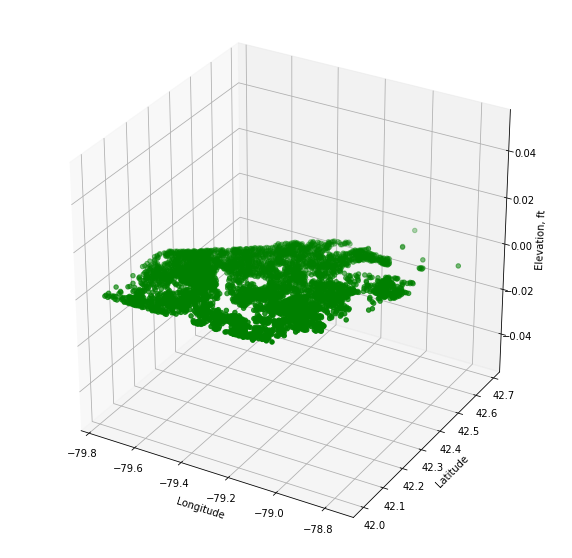

In [97]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

# need to convert long and lat degrees to State Plane Coordinates: East & North in feet or meters
# see refernce for conversion:
# https://www.iogp.org/wp-content/uploads/2019/09/373-07-02.pdf
# https://community.esri.com/thread/106211
# https://pubs.usgs.gov/pp/1395/report.pdf    


# This is a visual without conversion
xs, ys = fld['Surface Longitude'], fld['Surface Latitude']
zs = 0

# xs =[1,2,3,4,5,6,7,8,9,10]
# ys =[5,6,2,3,13,4,1,2,4,8]
# zs =[2,3,3,3,5,7,9,11,9,10]

# xt =[-1,-2,-3,-4,-5,-6,-7,8,-9,-10]
# yt =[-5,-6,-2,-3,-13,-4,-1,2,-4,-8]
# zt =[-2,-3,-3,-3,-5,-7,9,-11,-9,-10]

ax.scatter(xs, ys, zs, c='g', marker='o')
# ax.scatter(xt, yt, zt, c='b', marker='^')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Elevation, ft')

plt.show()

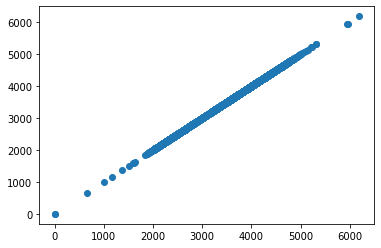

In [98]:
# fld['Surface Longitude'], # fld['Surface Latitude']

plt.scatter(fld['True Vertical Depth, ft'],fld['True Vertical Depth, ft'])#, s=area, c=colors, alpha=0.5)

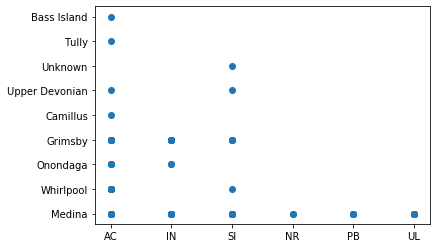

In [99]:
plt.scatter(fld['Well Status '],fld['Producing Formation'])#, s=area, c=colors, alpha=0.5)


In [100]:
# fld.head()

In [101]:
df.head()

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production
0,31009019120000,1988,"Sager, Howard & Judith",0.0,500.0,0.0,12.0
1,31009019120000,1989,"Sager, Howard & Judith",0.0,500.0,0.0,0.0
2,31009019120000,1990,"Sager, Howard & Judith",0.0,500.0,0.0,12.0
3,31009019120000,1991,"Sager, Howard & Judith",0.0,500.0,0.0,12.0
4,31009019120000,1992,"Sager, Howard & Judith",0.0,500.0,0.0,12.0


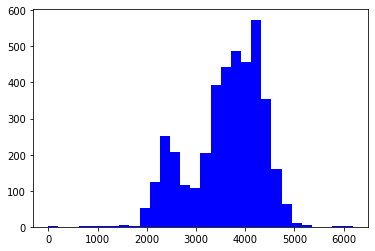

In [102]:
# drilled depth
num_bins = 30
x= fld['Drilled Depth, ft']
n, bins, patches = plt.hist(x, num_bins,facecolor='blue')

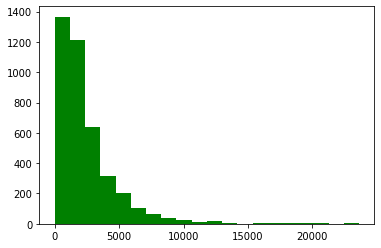

In [103]:
## average gas production distribution

df.groupby(df['API Well Number'])['GAS (Mcf)'].mean()

num_bins = 20
x= df.groupby(df['API Well Number'])['GAS (Mcf)'].mean()
n, bins, patches = plt.hist(x, num_bins,facecolor='green')

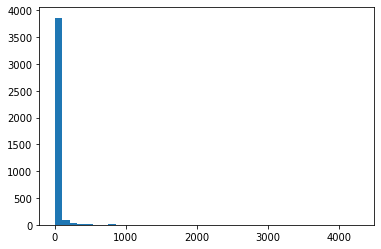

In [104]:
## average water distribution

# df.groupby(df['API Well Number'])['GAS (Mcf)'].mean()

num_bins = 40
x= df.groupby(df['API Well Number'])['WATER (Bbls)'].mean()
n, bins, patches = plt.hist(x, num_bins)

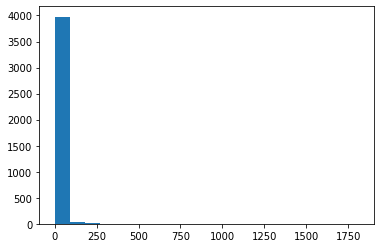

In [105]:
## average oil distribution

# df.groupby(df['API Well Number'])['GAS (Mcf)'].mean()

num_bins = 20
x= df.groupby(df['API Well Number'])['OIL (Bbls)'].mean()
n, bins, patches = plt.hist(x, num_bins)

### Fix zero gas production years - 

In [106]:
## number of years with non zero production

df[df['GAS (Mcf)'] < 0.1]['API Well Number'][600:]

4720      31009172090000
4721      31009172090000
4722      31009172090000
4723      31009172090000
4724      31009172090000
               ...      
121045    31029241880000
121046    31029241880000
121074    31029247420000
121136    31029254720000
121147    31029255050000
Name: API Well Number, Length: 10295, dtype: int64

In [107]:
# zero gas production well
# df[df['API Well Number']==31009172090000]

### Plot total gas production each year

In [108]:
df.loc[df['Year']==2018]['GAS (Mcf)'].sum(), df.loc[df['Year']==2019]['GAS (Mcf)'].sum()

(3623463.0, 3903685.0)

In [109]:
# len(df.loc[df['Year']==2018]),len(df.loc[df['Year']==2019])
# set(df.loc[df['Year']==2019]['API Well Number'])-set(df.loc[df['Year']==2015]['API Well Number'])
# df.loc[df['API Well Number']==31013224010000]

In [110]:
print(set(df["Year"]))

{1966, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019}


In [111]:
yearly_production = {}
for year in set(df["Year"]):
    yearly_production[year]=df.loc[df['Year']==year]['GAS (Mcf)'].sum()

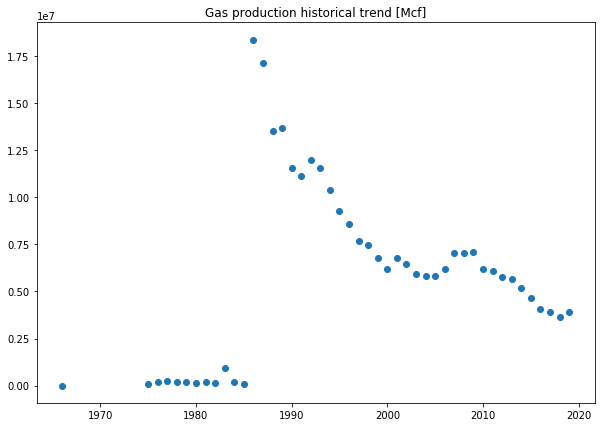

In [112]:
plt.figure(figsize=(10,7))
plt.scatter(yearly_production.keys(),yearly_production.values())
plt.title('Gas production historical trend [Mcf]')
plt.show()

# Plot total gas production vs year vs. number of active wells(=non zero production)

In [141]:
non_zero = df[df['GAS (Mcf)'] != 0].copy()

In [144]:
non_zero.sample(3)

,API Well Number,Year,Operator,OIL (Bbls),GAS (Mcf),WATER (Bbls),Months in Production
11061,31009220690000,2008,"Texas Keystone, Inc.",0.0,462.0,0.0,12.0
70955,31013165450000,1995,"Nornew, Inc.",0.0,4480.0,0.0,10.0
81223,31013179330000,2010,"EnerVest Operating, LLC",0.0,755.0,0.0,12.0


In [153]:
# example of year 2000 number of wells with non-zero production-meaning active wells
non_zero.loc[df['Year']==2000]['API Well Number'].nunique()

2986

In [154]:
set(df["Year"]) == set(non_zero["Year"])

True

In [155]:
active_well_numb = []
for year in set(set(df["Year"])):
    active_well_numb.append(non_zero.loc[df['Year']==year]['API Well Number'].nunique())

In [157]:
active_well_numb[:3]

[4, 14, 15]

TypeError: bar3d() missing 3 required positional arguments: 'dx', 'dy', and 'dz'

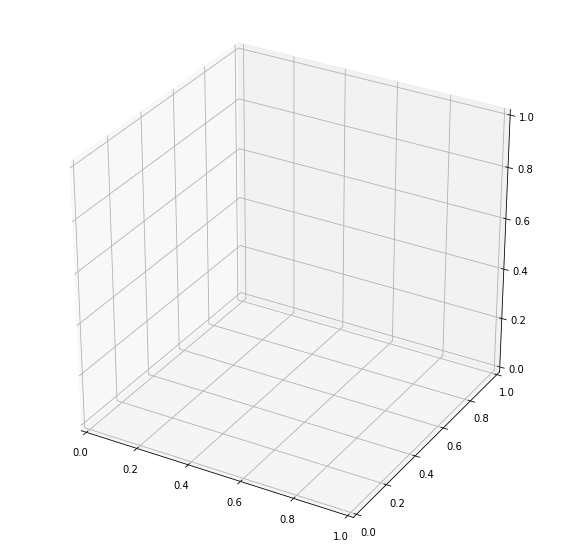

In [160]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

years = list(yearly_production.keys())
prod = list(yearly_production.values())


ax.bar3d(years, prod, active_well_numb)
# ax.scatter(xt, yt, zt, c='b', marker='^')

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()